##Preguntas Curso 5

In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
tesla = yf.Ticker("TSLA")

In [4]:
tesla_data = tesla.history(period="max")

Pregunta n°1 Tesla Yfinance

In [5]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Pregunta n°2 Tesla Webscraping

In [8]:
url_tesla = "https://finance.yahoo.com/quote/TSLA/financials"
heads_tesla = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"}

In [29]:
peticion_tesla=requests.get(url_tesla,headers=heads_tesla)

In [30]:
soup_tesla = BeautifulSoup(peticion_tesla.text,"html.parser")

In [31]:
filas_tesla = soup_tesla.find_all("div",{'data-test':'fin-row'})

In [57]:
revenue = []
for fila in filas_tesla:
    revenue = fila.find("div", {'Total Revenue':True})
    if revenue:
     valores_tesla = filas_tesla.find_all("div", recursive = False)[1:]
     revenue_text = [valor.text.strip() for valor in valores_tesla]
     revenue.extend(revenue_values)

In [58]:
print("Últimos 5 valores de Total Revenue de Tesla:")
print(revenue[:5])

Últimos 5 valores de Total Revenue de Tesla:
[]


Pregunta 3 Gamestop Yfinance

In [46]:
gs = yf.Ticker("GME")
gs_data = gs.history(period="max")
gs_data.reset_index(inplace=True)
gs_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Pregunta 4 Webscraping GameStop

In [61]:
url_gs = "https://finance.yahoo.com/quote/GME/financials"
headers_gs = {"User-Agent":"Mozilla/5.0} (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"}
peticion_gs = requests.get(url_gs, headers=headers_gs)
soup_gs = BeautifulSoup(peticion_gs.text,"html.parser")
filas_gs = soup_gs.find_all("div",{'data-test':'fin-row'})

In [64]:
gs_revenue = []
for fila in filas_gs:
    gs_revenue = fila.find("div", {'Total Revenue':True})
    if gs_revenue:
     valores_gs = filas_gs.find_all("div", recursive = False)[1:]
     gs_revenue_text = [valor.text.strip() for valor in valores_gs]
     gs_revenue.extend(revenue_values)

In [65]:
print("Últimos 5 valores de Total Revenue de GameStop:")
print(revenue[:5])

Últimos 5 valores de Total Revenue de GameStop:
[]


Importar Matplotlib

In [49]:
import matplotlib.pyplot as plt

Pregunta 5 Cuadro acciones Tesla

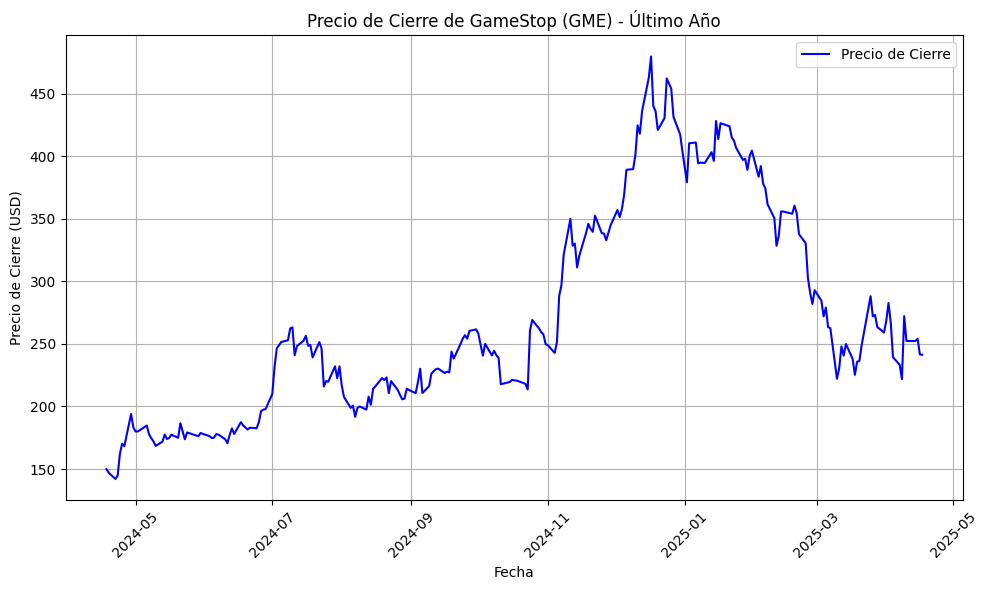

In [53]:
tesla_data1=tesla.history(period="1y")

def make_graph(tesla_data1):
    plt.figure(figsize=(10, 6))
    plt.plot(tesla_data1.index, tesla_data1['Close'], label='Precio de Cierre', color='blue')
    plt.title("Precio de Cierre de GameStop (GME) - Último Año")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre (USD)")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
make_graph(tesla_data1)

Pregunta 6 Cuadro acciones GameStop

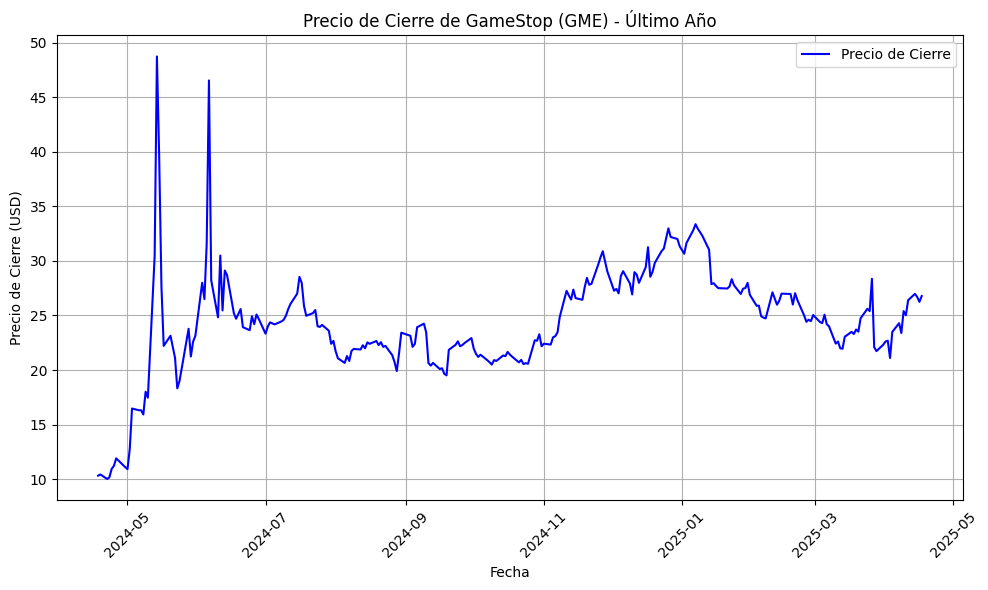

In [52]:
gs_data1=gs.history(period="1y")

def make_graph(gs_data1):
    plt.figure(figsize=(10, 6))
    plt.plot(gs_data1.index, gs_data1['Close'], label='Precio de Cierre', color='blue')
    plt.title("Precio de Cierre de GameStop (GME) - Último Año")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre (USD)")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
make_graph(gs_data1)